In [77]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns

from thinkdsp_2 import decorate, read_wave

# Read .wav file and plot its spectrogram

In [38]:
def plot_spectrogram(wave, seg_length):
    """
    """
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

In [73]:
wave = read_wave('sna16.wav')

## This music contains two motifs:
- Motif  I:  0 - 27 sec
- Motif II: 27 - 54 sec
- Motif  I: 54 - 81 sec
- Motif II: 81 -108 sec

You can listen to the difference between motif I and motif II in the first 54 seconds and observe their difference in the spectrogram.

Time resolution (s) 0.5
Frequency resolution (Hz) 2.0


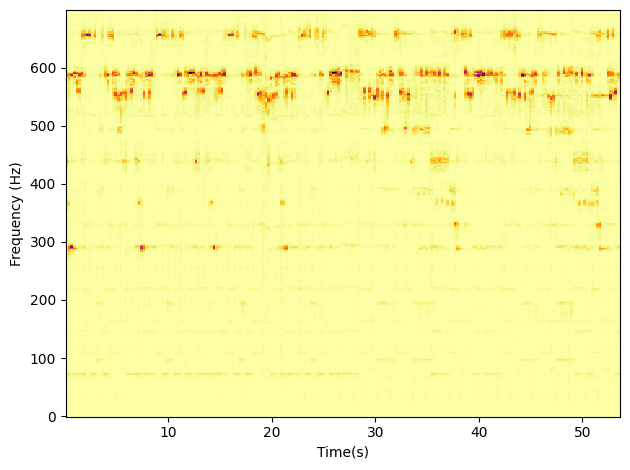

In [74]:
segment=wave.segment(start=0,duration=54)
plot_spectrogram(segment, 22050)
segment.make_audio()

# Visualize Spectrogram in UMAP

First let's visualize the spectrogram in UMAP. Each dot is an FFT (magnitude) slice of 1 sec. Motif I is colored by blue (0-27 sec) and green (54-81 sec), and motif II is colored by orange (27-54 sec) and red (81-108 sec). You can see some clusters there. However, motif I and motif II have a lot of overlaps, and it's hard to differentiate the two motifs.

Text(0.5, 1.0, 'UMAP projection of FFT slices over 110s')

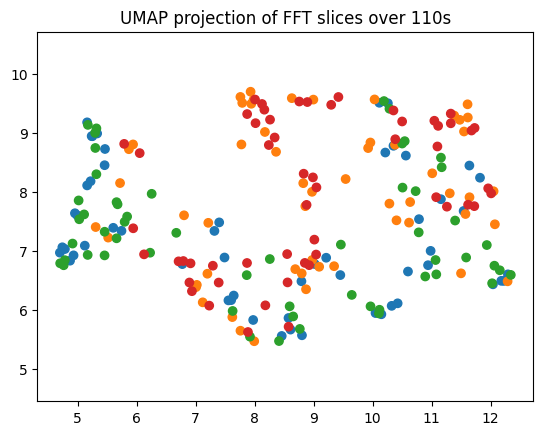

In [76]:
S = wave.make_spectrogram_2(44100)
embedding_1 = umap.UMAP(n_neighbors = 20).fit_transform(abs(S))

K=np.hstack([np.zeros(55,dtype=int),np.ones(55,dtype=int),np.zeros(55,dtype=int)+2,np.ones(54,dtype=int)+2])

plt.scatter(
    embedding_1[:219, 0],
    embedding_1[:219, 1],
    c=[sns.color_palette()[x] for x in K]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of FFT slices over 110s', fontsize=12)

# Revealing the Strctures of Music Motifs with Trigrams

In this experiment, we applied the operations of HD computing to the FFT slices as is done in [1], and generate trigrams from the FFT slices. The structures and the difference between motif I and motif II can be clearly seen in UMAP now. (Note: HD computing [2] is a brain-inspired alternative to machine learning)
<br>
<br>
[1] Wong, Justin. "Negative capacitance and hyperdimensional computing for unconventional low-power computing." University of California, Berkeley, PhD Thesis (2018).
<br>
[2] Kanerva, Pentti. "Hyperdimensional computing: An introduction to computing in distributed representation with high-dimensional random vectors." Cognitive computation 1 (2009): 139-159.

In [112]:
#Generate Random Permutation Matrix
(N0, N1)= S.shape
P = np.random.permutation(N1)
P2 = P[P]

#Computing Trigrams
trigram = np.zeros((N0-2, N1),dtype = complex)

for i in range(0,S.shape[0]-2):
    trigram[i,:] = S[i,:][P2] + S[i+1,:][P] + S[i+2,:]

Text(0.5, 1.0, 'UMAP projection of trigrams over 110s')

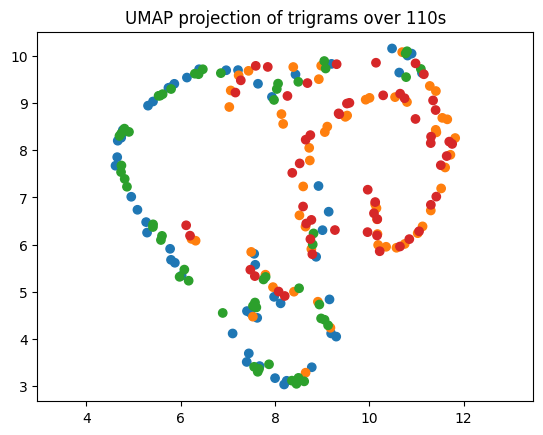

In [113]:
embedding_2 = umap.UMAP(n_neighbors=15).fit_transform(abs(trigram))
plt.scatter(
    embedding_2[:, 0],
    embedding_2[:, 1],
    c=[sns.color_palette()[x] for x in K]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of trigrams over 110s', fontsize=12)

Now you can clearly see the structure and trajectory difference between motif I and motif II.
- Motif  I:  0 - 27 sec (blue)
- Motif II: 27 - 54 sec (orange)
- Motif  I: 54 - 81 sec (green)
- Motif II: 81 -108 sec (red)